# Client Churn Analysis Report

**Client Analyst Assignment**

**Objective**: Analyze churned client data to identify top reasons for churn and uncover patterns related to subscription plans, client owners, and payment behavior.

**Data Source**: Excel file containing client churn details.


In [104]:
# Step 1 : Read the Data

In [105]:


import pandas as pd

# Load the file from the `data` folder
file_path = 'data/churn_data.xlsx'
df = pd.read_excel(file_path)

# Show the top 5 rows to get the preview 
df.head()


,subscriptions.id,customers.company,brand name,subscriptions_plan_unit_price,client owner,No. of recurring invoices paid,Subscription start,Cancelled at,Reason 1,Reason 2,Reason 3
0,AzqbtwTQBPPY46TqL,Baella Stitch,baellastitch,4900.0,Tejashree,0,16-12-2022,15-01-2023,Not answering calls,NaN,NaN
1,Azqbx5TP8TaeaAP1,veganway,veganway,3500.0,Tejashree,1,2022-05-12 00:00:00,28-01-2023,Went for other partnership,NaN,NaN
2,AzqJRVTOfD5R0ofu,SOLVVE,solvve,3500.0,Tejashree,2,30-11-2022,30-01-2023,Went for other partnership,NaN,NaN
3,169mLgTLBavzU1qEg,RAASO CLEANING PRODUCTS PVT LTD,soviandtydi,7800.0,Tejashree,1,2023-05-04 00:00:00,15-07-2023,No dedicated person to handle dashboard,Better pricing,NaN
4,169mDMTKuWyLW1Urz,Homemade Love LLP,homemadelove,7800.0,Atiq,1,20-10-2022,23-01-2023,woocommerce problems,Bad product experience,Not answering calls


# Step 2 : Clean The Data


In [106]:
# Clean up column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Show the cleaned column names
df.columns


Index(['subscriptions.id', 'customers.company', 'brand_name',
       'subscriptions_plan_unit_price', 'client_owner',
       'no._of_recurring_invoices_paid', 'subscription_start', 'cancelled_at',
       'reason_1', 'reason_2', 'reason_3'],
      dtype='object')

## Reshaping Churn Reasons (Wide to Long Format)

Each customer could provide up to 3 reasons for churn: `reason_1`, `reason_2`, and `reason_3`.  
However, not all customers filled all three — some provided only 1 or 2.

To simplify the analysis, we transformed the data from a wide format (multiple columns for reasons) into a long format (one row per reason).  
This allows us to analyze and visualize churn reasons more effectively, with each reason treated as an individual feedback entry.

This step also keeps the related customer details (like company name, client owner, and plan price) alongside each churn reason.


In [107]:
# Step 1: Melt the data (flatten)
reasons_flat = pd.melt(
    df,
    id_vars=['customers.company', 'client_owner', 'subscriptions_plan_unit_price', 'no._of_recurring_invoices_paid'],
    value_vars=['reason_1', 'reason_2', 'reason_3'],
    var_name='reason_number',
    value_name='reason'
)

# Step 2: Drop NaNs
reasons_flat = reasons_flat.dropna(subset=['reason'])

# ✅ Step 3: Drop duplicates (same company giving same reason multiple times)
reasons_flat = reasons_flat.drop_duplicates(subset=['customers.company', 'reason'])

# Step 4: Reset index
reasons_flat = reasons_flat.reset_index(drop=True)

# Now count again
top_reasons = reasons_flat['reason'].value_counts().head(5)
top_reasons


reason
Not answering calls                        50
New features                               43
No dedicated person to handle dashboard    27
Dont want to focus on Whatsapp             21
Revamping Business                         20
Name: count, dtype: int64

# Step 4: Identify the Top 5 Reasons for Churn


In [108]:
# Count how many times each churn reason appears
top_reasons = reasons_flat['reason'].value_counts().head(5)

# Display the top 5 reasons
top_reasons

reason
Not answering calls                        50
New features                               43
No dedicated person to handle dashboard    27
Dont want to focus on Whatsapp             21
Revamping Business                         20
Name: count, dtype: int64

# Step 5: Visualize Top 5 Churn Reasons


## Bar chart


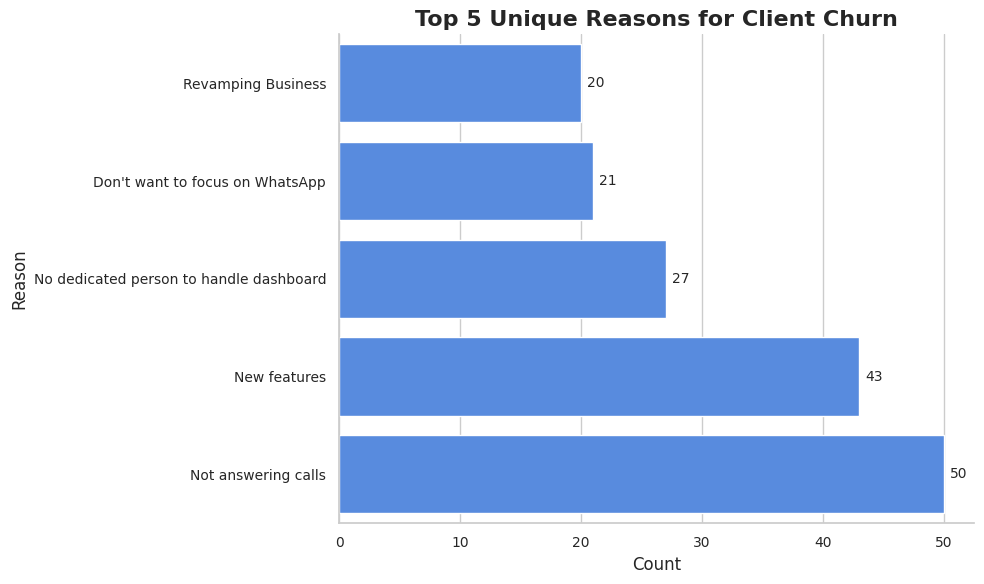

In [109]:
# Final sorted DataFrame
top_df = top_reasons.reset_index()
top_df.columns = ['reason', 'count']
top_df['reason'] = top_df['reason'].replace("Dont want to focus on Whatsapp", "Don't want to focus on WhatsApp")
top_df = top_df.sort_values('count', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_df,
    x='count',
    y='reason',
    color='#4285F4'  # Google blue
)

# Add count labels
for index, value in enumerate(top_df['count']):
    ax.text(value + 0.5, index, str(value), va='center', fontsize=10)

# Styling
plt.title("Top 5 Unique Reasons for Client Churn", fontsize=16, weight='bold')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Reason", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.tight_layout()

# Save high-res image
plt.savefig("top_churn_reasons.png", dpi=300)
plt.show()


## Pie chart

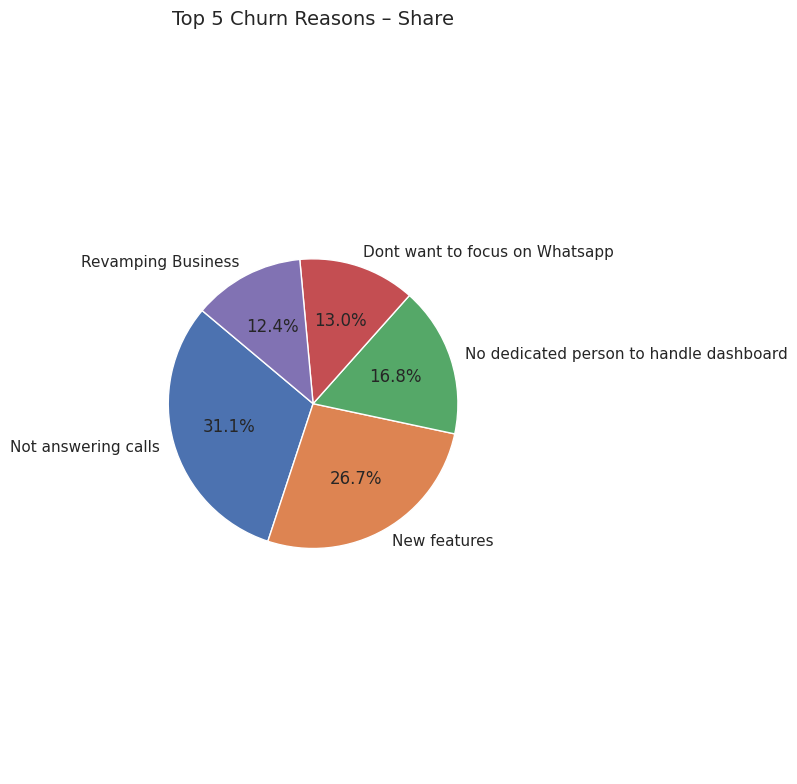

In [110]:
plt.figure(figsize=(8, 8))
plt.pie(top_reasons.values, labels=top_reasons.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Churn Reasons – Share", fontsize=14)
plt.axis('equal')  # Makes the pie a circle
plt.tight_layout()
plt.show()


# Part 2 : Churn Analysis by Client Attributes

In [111]:
reasons_flat

,customers.company,client_owner,subscriptions_plan_unit_price,no._of_recurring_invoices_paid,reason_number,reason
0,Baella Stitch,Tejashree,4900.0,0,reason_1,Not answering calls
1,veganway,Tejashree,3500.0,1,reason_1,Went for other partnership
2,SOLVVE,Tejashree,3500.0,2,reason_1,Went for other partnership
3,RAASO CLEANING PRODUCTS PVT LTD,Tejashree,7800.0,1,reason_1,No dedicated person to handle dashboard
4,Homemade Love LLP,Atiq,7800.0,1,reason_1,woocommerce problems
...,...,...,...,...,...,...
321,Madhurya,Amitesh,999.0,0,reason_3,Dont want to focus on Whatsapp
322,optiminastic foods and beverages,Tejashree,7800.0,4,reason_3,Not using the Dashboard
323,Just Digital,Amitesh,3500.0,3,reason_3,Bad client
324,Tutto bene Delicatessen,Tejashree,5800.0,6,reason_3,Dont want to focus on Whatsapp


### Group all churned clients by their subscription plan and count how many reasons came from each plan

In [112]:
# Group the flattened reasons by plan
plan_churn = reasons_flat.groupby('subscriptions_plan_unit_price')['reason'].count().sort_values(ascending=False)

# Display the result
plan_churn


subscriptions_plan_unit_price
7800.0     191
4900.0      61
14999.0     14
2500.0      14
3500.0      13
999.0        9
6000.0       4
9800.0       4
5800.0       3
3000.0       3
23400.0      2
4400.0       2
20000.0      2
4000.0       1
12000.0      1
46800.0      1
Name: reason, dtype: int64

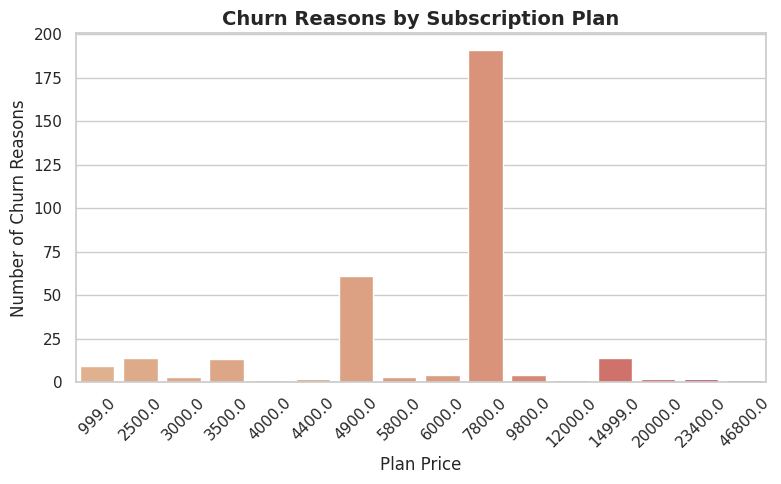

In [113]:
# Convert the Series to DataFrame for plotting
plan_churn_df = plan_churn.reset_index()
plan_churn_df.columns = ['plan_price', 'count']

# Plot without Seaborn hue warning
plt.figure(figsize=(8, 5))
sns.barplot(
    data=plan_churn_df,
    x='plan_price',
    y='count',
    palette='flare',
    hue='plan_price',
    legend=False  # disables repeated legend
)

plt.title("Churn Reasons by Subscription Plan", fontsize=14, weight='bold')
plt.xlabel("Plan Price", fontsize=12)
plt.ylabel("Number of Churn Reasons", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Group all Churn by Client Owner

In [114]:
# Group by client owner
owner_churn = reasons_flat.groupby('client_owner')['reason'].count().sort_values(ascending=False)

# Display result
owner_churn


client_owner
Tejashree    93
Amitesh      49
Vaishnavi    48
xavier       37
Devang       33
Mohammed     26
Divya        23
Atiq         15
Name: reason, dtype: int64

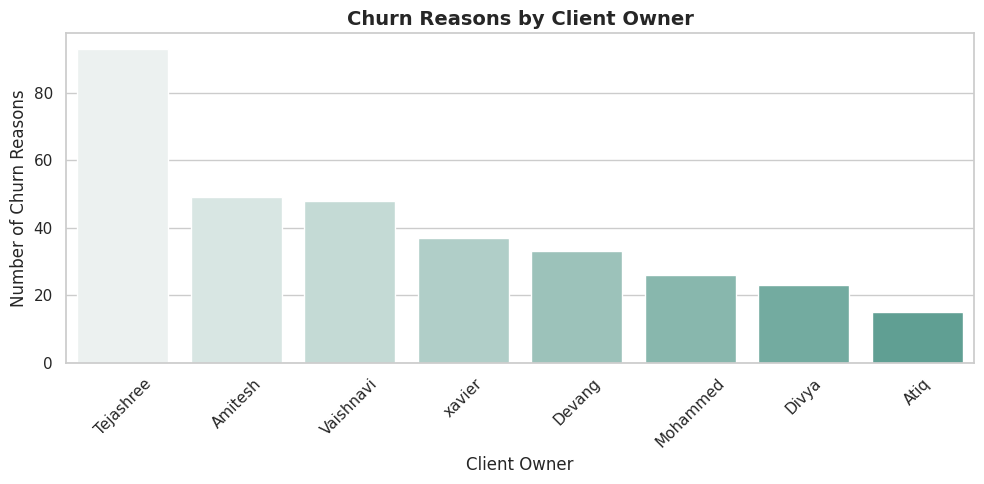

In [115]:
# Group and prepare data
owner_churn = reasons_flat.groupby('client_owner')['reason'].count().sort_values(ascending=False)
owner_df = owner_churn.reset_index()
owner_df.columns = ['client_owner', 'count']

# Plot with hue to fix warning
plt.figure(figsize=(10, 5))
sns.barplot(
    data=owner_df,
    x='client_owner',
    y='count',
    hue='client_owner',
    palette='light:#5A9',
    legend=False
)

plt.title("Churn Reasons by Client Owner", fontsize=14, weight='bold')
plt.xlabel("Client Owner", fontsize=12)
plt.ylabel("Number of Churn Reasons", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Group clients by how many invoices they paid before churning, and count how many churn reasons came from each group

In [116]:
# Group by number of invoices paid
invoice_churn = reasons_flat.groupby('no._of_recurring_invoices_paid')['reason'].count().sort_index()

# Display result
invoice_churn


no._of_recurring_invoices_paid
0      20
1     122
2      69
3      39
4      21
5      19
6      12
7       3
8       5
9       8
10      7
12      1
Name: reason, dtype: int64

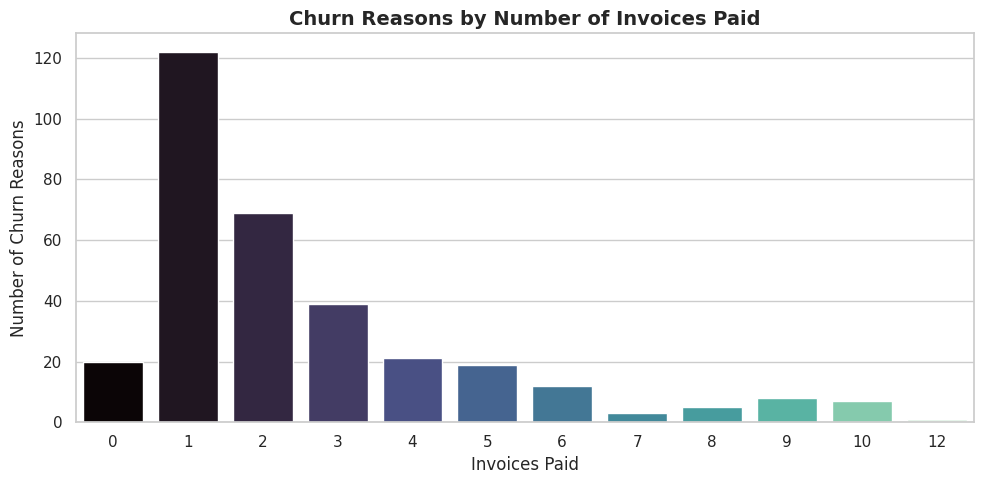

In [117]:
plt.figure(figsize=(10, 5))

sns.barplot(
    data=invoice_df,
    x='invoices_paid',
    y='count',
    hue='invoices_paid',
    palette='mako',
    legend=False        
)

plt.title("Churn Reasons by Number of Invoices Paid", fontsize=14, weight='bold')
plt.xlabel("Invoices Paid", fontsize=12)
plt.ylabel("Number of Churn Reasons", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
